## Imports

In [6]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import reuters
from keras import models
from keras import layers 
from keras.models import model_from_json
from keras import backend as K
K.set_image_data_format('channels_last')
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from statistics import mode
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Data Analysis and pre-processing

### getting the mode of height and width

In [7]:


path = '/home/innolab2/ads_semi_not/original_data/'
files = os.listdir(path)

heights = []
widths = []

for f in files:
    img = cv2.imread(path + f)
    if img is None:
        continue
    
    height, width, channels = img.shape
    
    heights.append(height)
    widths.append(width)
    

print(mode(heights))
print(mode(widths))


45
74


### Aplying threshold and resizing 

In [12]:
path = '/home/innolab2/ads_semi_not/original_data/'
files = os.listdir(path)

skipped = 0
total = 0

for f in files:
    img = cv2.imread(path+f)
    if img is None:
        continue
    height, width, channels = img.shape
        
    
    # applying threshold on 20 pixel (too small)
    if(height < 20 or width < 20):
        skipped+= 1
        continue
    
    # new size according to the mode 
    new_width = 70
    new_height = 50
    dim = (new_width, new_height)

    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    cv2.imwrite("/home/innolab2/ads_semi_not/new_data/" + f, resized)
    total += 1
    
print(skipped)
print(total)

6196
64282


In [14]:
# Organize data into train, valid, test dirs
os.chdir('/home/innolab2/ads_semi_not/final_data/')
if os.path.isdir('train/ads') is False:
    os.makedirs('train/ads')
    os.makedirs('train/no_ads')
    os.makedirs('train/semi_ads')
  
    os.makedirs('valid/ads')
    os.makedirs('valid/no_ads')
    os.makedirs('valid/semi_ads')
    
    
    os.makedirs('test/ads')
    os.makedirs('test/no_ads')
    os.makedirs('test/semi_ads')
    
    number_train = 50000
    number_valid = 1000
    number_test = 600
    number_classes = 3
    
    for i in random.sample(glob.glob('ad*'), int(number_train/number_classes)):
        shutil.move(i, 'train/ads')      
    for i in random.sample(glob.glob('no*'), int(number_train/number_classes)):
        shutil.move(i, 'train/no_ads')
    for i in random.sample(glob.glob('semi*'), int(number_train/number_classes)):
        shutil.move(i, 'train/semi_ads')

        
    for i in random.sample(glob.glob('ad*'), int(number_valid/number_classes)):
        shutil.move(i, 'valid/ads')      
    for i in random.sample(glob.glob('no*'), int(number_valid/number_classes)):
        shutil.move(i, 'valid/no_ads')
    for i in random.sample(glob.glob('semi*'), int(number_valid/number_classes)):
        shutil.move(i, 'valid/semi_ads')

        
        
    for i in random.sample(glob.glob('ad*'), int(number_test/number_classes)):
        shutil.move(i, 'test/ads')      
    for i in random.sample(glob.glob('no*'), int(number_test/number_classes)):
        shutil.move(i, 'test/no_ads')
    for i in random.sample(glob.glob('semi*'), int(number_test/number_classes)):
        shutil.move(i, 'test/semi_ads')

os.chdir('../../')

## Process the data

In [15]:
train_path = '/home/innolab2/ads_semi_not/final_data/train'
valid_path = '/home/innolab2/ads_semi_not/final_data/valid'
test_path = '/home/innolab2/ads_semi_not/final_data/test'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(new_width,new_height), classes=['ads', 'semi_ads','no_ads'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(new_width,new_height), classes=['ads', 'semi_ads', 'no_ads'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(new_width,new_height), classes=['ads', 'semi_ads','no_ads'], batch_size=10, shuffle=False)
                         
                         
                         
imgs, labels = next(train_batches)

            
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Found 49998 images belonging to 3 classes.
Found 999 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

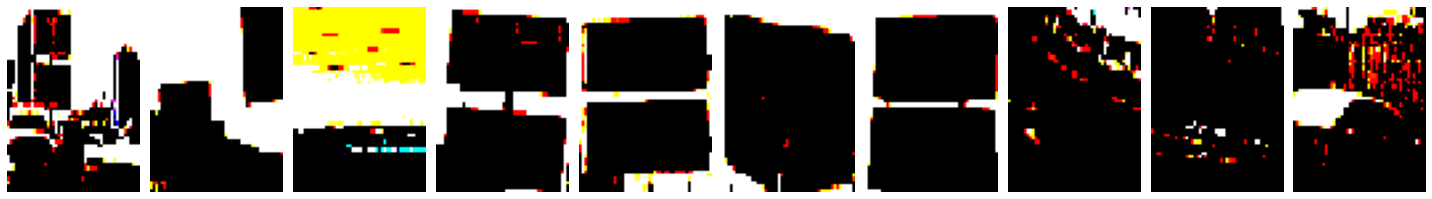

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
(10, 70, 50, 3)


In [32]:
plotImages(imgs)
print(labels)
print(imgs.shape)

## The Model

In [17]:
#Design the CNN layers here
def cnn_model():
    # create model
    model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(70,50,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13056)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 39171     
Total params: 58,563
Trainable params: 58,563
Non-trainable params: 0
____________________________________________________

In [20]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=1
)

Train for 5000 steps, validate for 100 steps
Epoch 1/10
5000/5000 [==============================] - 60s 12ms/step - loss: 0.3634 - accuracy: 0.9105 - val_loss: 0.1520 - val_accuracy: 0.9510
Epoch 2/10
5000/5000 [==============================] - 60s 12ms/step - loss: 0.1258 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy: 0.9670
Epoch 3/10
5000/5000 [==============================] - 61s 12ms/step - loss: 0.0828 - accuracy: 0.9707 - val_loss: 0.1361 - val_accuracy: 0.9520
Epoch 4/10
5000/5000 [==============================] - 61s 12ms/step - loss: 0.0580 - accuracy: 0.9792 - val_loss: 0.1029 - val_accuracy: 0.9750
Epoch 5/10
5000/5000 [==============================] - 60s 12ms/step - loss: 0.0466 - accuracy: 0.9836 - val_loss: 0.1086 - val_accuracy: 0.9790
Epoch 6/10
5000/5000 [==============================] - 61s 12ms/step - loss: 0.0373 - accuracy: 0.9867 - val_loss: 0.0829 - val_accuracy: 0.9800
Epoch 7/10
5000/5000 [==============================] - 60s 12ms/step - loss: 0

## visualizing the accuracy and loss curves

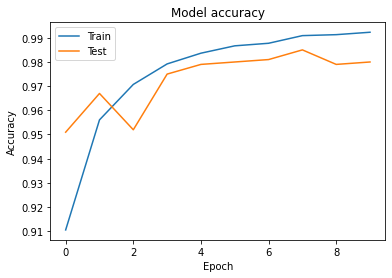

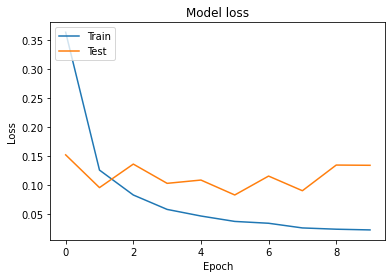

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Testing Accuracy

In [24]:
scores = model.evaluate(test_batches, verbose=0)
print("CNN Error Rate: %.2f%%" % (100 - scores[1]*100))
print("Accuracy: " + str(scores[1]*100) + '%')

CNN Error Rate: 2.17%
Accuracy: 97.83333539962769%


## Predict some images with our model and check there correct label

[0]


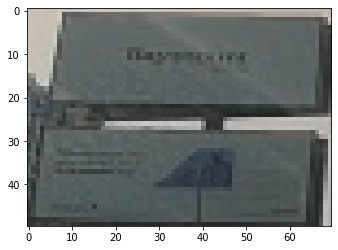

In [41]:
test_image = cv2.imread("/home/innolab2/ads_semi_not/final_data/ad_1.jpg")
x_image = cv2.resize(test_image, (new_height,new_width), interpolation = cv2.INTER_AREA)
x_image = tf.keras.applications.vgg16.preprocess_input(x_image)
x_s = [x_image]
x_s = np.array(x_s)
y = model.predict_classes(x_s)
plt.imshow(test_image)
print(y)

[1]


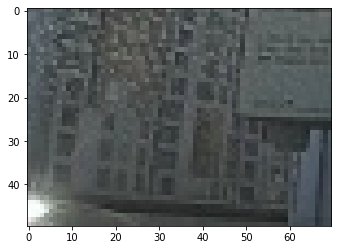

In [42]:
test_image = cv2.imread("/home/innolab2/ads_semi_not/final_data/semi_23.jpg")
x_image = cv2.resize(test_image, (new_height,new_width), interpolation = cv2.INTER_AREA)
x_image = tf.keras.applications.vgg16.preprocess_input(x_image)
x_s = [x_image]
x_s = np.array(x_s)
y = model.predict_classes(x_s)
plt.imshow(test_image)
print(y)

[2]


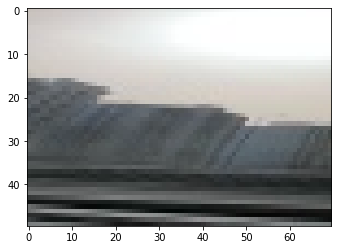

In [43]:
test_image = cv2.imread("/home/innolab2/ads_semi_not/final_data/no_9.jpg")
x_image = cv2.resize(test_image, (new_height,new_width), interpolation = cv2.INTER_AREA)
x_image = tf.keras.applications.vgg16.preprocess_input(x_image)
x_s = [x_image]
x_s = np.array(x_s)
y = model.predict_classes(x_s)
plt.imshow(test_image)
print(y)

### 0 -> full ad
### 1 -> semi ad
### 2 -> no ad

## Save the model weights

In [69]:

# serialize model to JSON
model_json = model.to_json()
with open("/home/innolab2/ads_semi_not/models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/home/innolab2/ads_semi_not/models/model.h5")
print("Saved model to disk")

Saved model to disk


## Start running cells from here

In [71]:
load_model
# load json and create model
json_file = open('/home/innolab2/ads_semi_not/models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('/home/innolab2/ads_semi_not/models/model.h5')
print("Loaded model from disk")


Loaded model from disk


In [72]:
def image_pre_processing(img):
    
    new_image = cv2.resize(test_image, (new_height,new_width), interpolation = cv2.INTER_AREA)
    new_image = tf.keras.applications.vgg16.preprocess_input(x_image)
    x_s = [x_image]
    x_s = np.array(x_s)
    return x_s

    
    

[1]


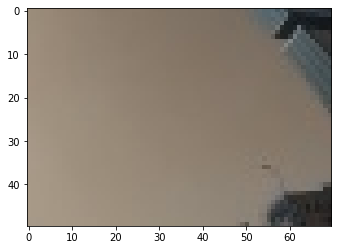

In [77]:

test_image = cv2.imread("/home/innolab2/ads_semi_not/final_data/no_8.jpg")
final_test = image_pre_processing(test_image)
y = loaded_model.predict_classes(final_test)
plt.imshow(test_image) 
print(y)